In [1]:
import os # For operating system dependent functionality
import cv2 # OpenCV array structures are converted to and from Numpy arrays - For reading Images
import glob # Find all the pathnames matching a specified pattern
import numpy as np # A powerful N-dimensional array object
import pandas as pd # Data frame manipulation
from matplotlib import pyplot as plt # Plotting graphs
import seaborn as sns # Plotting graphs
from keras.utils import np_utils # Modelling
from sklearn.metrics import accuracy_score, classification_report # Modelling

Using TensorFlow backend.


In [2]:
# Get the list of all the driver images
path = r'C:/Users/SIDDY/Desktop/Business Analytics for sustainable world/Final Use case/all'
df = pd.read_csv(path + '/driver_imgs_list.csv')

# The 10 classes to predict are:
    # c0: safe driving
    # c1: texting - right
    # c2: talking on the phone - right
    # c3: texting - left
    # c4: talking on the phone - left
    # c5: operating the radio
    # c6: drinking
    # c7: reaching behind
    # c8: hair and makeup
    # c9: talking to passenger

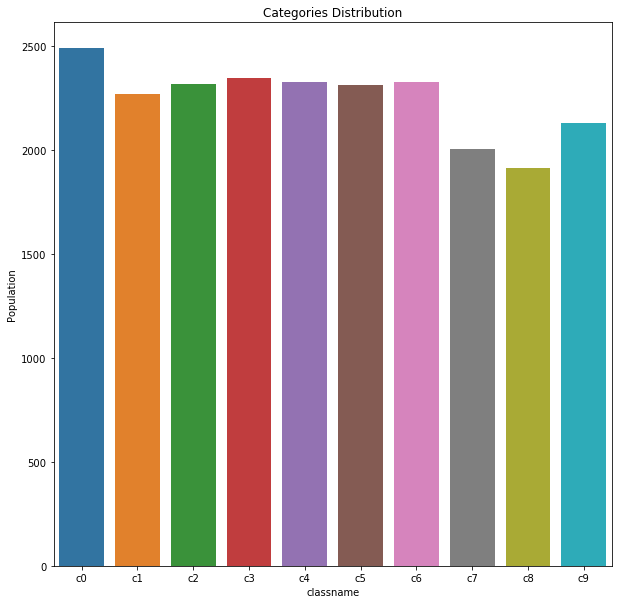

In [3]:
# Plot figure size
plt.figure(figsize = (10,10))
# Count the number of images per category
sns.countplot(x = 'classname',data = df)
# Change the Axis names
plt.ylabel('Population')
plt.title('Categories Distribution')
# Save the Categories_Distribution Image
# sns.plt.savefig(path + '/Categories_Distribution.png')
# Show plot
plt.show()

In [4]:
# Find the frequency of images per driver
drivers_id = pd.DataFrame((df['subject'].value_counts()).reset_index())
drivers_id.columns = ['driver_id', 'Counts']
print(drivers_id)

   driver_id  Counts
0       p021    1237
1       p022    1233
2       p024    1226
3       p026    1196
4       p016    1078
5       p066    1034
6       p049    1011
7       p051     920
8       p014     876
9       p015     875
10      p035     848
11      p047     835
12      p012     823
13      p081     823
14      p064     820
15      p075     814
16      p061     809
17      p056     794
18      p050     790
19      p052     740
20      p002     725
21      p045     724
22      p039     651
23      p041     605
24      p042     591
25      p072     346


In [5]:
# As the Drivers in the test set are different than the ones in the traning set
# Keep unique drivers in training and validation(pre-test) data respectively

train_id = list(drivers_id.iloc[0:20,0])

train_img_id = df[df.subject.isin(train_id) == True]
test_img_id = df[df.subject.isin(train_id) == False]

In [6]:
# Separate image driver ID and image name for Training
train_driver_id = list(train_img_id[['subject','img']].set_index('img').to_dict().values()).pop()
train_img_name = list(train_img_id['img'])

# Separate image driver ID and image name for Testing
test_driver_id = list(test_img_id[['subject','img']].set_index('img').to_dict().values()).pop()
test_img_name = list(test_img_id['img'])

In [7]:
# Delete unwanted variables
del df, drivers_id, train_id, train_img_id, test_img_id

In [8]:
# Create training data
# Function to read the images in gray scale and resize the image
# Map it to the category of the image and driver ID
def load_train():
    y_train = [] # Target
    X_train = [] # Resized image
    driver_id_train = [] # Driver ID

    print('Read images')
    
    # Range = 5 because in our path we have five folders
    for j in range(5):     
        
        print('Load folder c{}'.format(j))
        # Create path of all the folders one by one
        path = r'C:\Users\SIDDY\Desktop\Business Analytics for sustainable world\Final Use case\all\imgs\train\c' + str(j) +'\*.jpg'
        
        # Glob will help to read all the images from each folder
        files = glob.glob(path)
        
        # Iterate to read each image
        for fl in files:
            
            # Take only the base name i.e., img_name.jpg
            flbase = os.path.basename(fl)
            
            # Take images only for the driver IDs which are in train (i.e., not in test)
            if flbase in train_img_name:
                
                # Read images in gray scale
                img = cv2.imread(fl, 0)
                
                # Resize the image
                img_resized = cv2.resize(img,(224,224))
                
                # Append Caregory of the image
                y_train.append(j)
                # Append Resized image
                X_train.append(img_resized)
                # Append Driver ID
                driver_id_train.append(train_driver_id[flbase])
    
    return np.array(y_train, dtype=np.uint8) , np.array(X_train, dtype=np.uint8), driver_id_train

# Load all the training image data
y_train, X_train, driver_id_train = load_train()

Read images
Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4


In [9]:
# Create testing data
# Function to read the images in gray scale and resize the image
# Map it to the category of the image and driver ID
def load_test():
    y_test = [] # Target
    X_test = [] # Resized image
    driver_id_test = [] # Driver ID
    
    print('Read images')
    
    # Range = 5 because in our path we have five folders
    for j in range(5):     
        
        print('Load folder c{}'.format(j))
        # Create path of all the folders one by one
        path = r'C:\Users\SIDDY\Desktop\Business Analytics for sustainable world\Final Use case\all\imgs\train\c' + str(j) +'\*.jpg'
        
        # Glob will help to read all the images from each folder
        files = glob.glob(path)
        
        # Iterate to read each image
        for fl in files:
            
            # Take only the base name i.e., img_name.jpg
            flbase = os.path.basename(fl)
            
            # Take images only for the driver IDs which are in test (i.e., not in train)
            if flbase in test_img_name:
                
                # Read images in gray scale
                img = cv2.imread(fl, 0)
                # Resize the image
                img_resized = cv2.resize(img,(224,224))
                
                # Append Caregory of the image
                y_test.append(j)
                # Append Resized image
                X_test.append(img_resized)
                # Append Driver ID
                driver_id_test.append(test_driver_id[flbase])
    return np.array(y_test, dtype=np.uint8) , np.array(X_test, dtype=np.uint8), driver_id_test

# Load all the testing image data
y_test, X_test, driver_id_test = load_test()

Read images
Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4


In [10]:
# Delete unwanted variables
del train_img_name, train_driver_id, test_img_name, test_driver_id

In [11]:
# Normalized the data (divide by 255 because colour (Gray-scale) range lies between 0 to 255)
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.astype('float32')
X_test /= 255

In [12]:
# Convert the 2D Dimension to 3D so that we can pass the image to CNN
X_train = X_train.reshape(X_train.shape[0], 224, 224, 1)
X_test = X_test.reshape(X_test.shape[0], 224, 224, 1)

# Convert target to arrays of categories
# 5 beacuse we have 5 categories
y_train = np_utils.to_categorical(y_train, 5)
y_test = np_utils.to_categorical(y_test, 5)

In [13]:
# Neural Network Model
np.random.seed(11)
from tensorflow import set_random_seed
set_random_seed(11)
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Dense, Flatten, Dropout

In [14]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size =(3,3),strides = (2,2),input_shape=(224, 224, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32 ,kernel_size =(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

In [40]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train,validation_split=0.1, epochs=20, batch_size=200)

Train on 8838 samples, validate on 982 samples
Epoch 1/20
8838/8838 [==============================] - 133s - loss: 1.2264 - acc: 0.5114 - val_loss: 1.2957 - val_acc: 0.3534
Epoch 2/20
8838/8838 [==============================] - 134s - loss: 0.3261 - acc: 0.8931 - val_loss: 0.2361 - val_acc: 0.9521
Epoch 3/20
8838/8838 [==============================] - 135s - loss: 0.1159 - acc: 0.9668 - val_loss: 0.0845 - val_acc: 0.9817
Epoch 4/20
8838/8838 [==============================] - 134s - loss: 0.0654 - acc: 0.9814 - val_loss: 0.0836 - val_acc: 0.9817
Epoch 5/20
8838/8838 [==============================] - 135s - loss: 0.0375 - acc: 0.9893 - val_loss: 0.0494 - val_acc: 0.9898
Epoch 6/20
8838/8838 [==============================] - 139s - loss: 0.0342 - acc: 0.9895 - val_loss: 0.0512 - val_acc: 0.9908
Epoch 7/20
8838/8838 [==============================] - 145s - loss: 0.0207 - acc: 0.9940 - val_loss: 0.0314 - val_acc: 0.9939
Epoch 8/20
8838/8838 [==============================] - 146s - l

In [23]:
# Prob prediction for each class
pred = model.predict(X_test)

# Class prediction
pred_class = model.predict_classes(X_test)

# Chceking loss and accuracy score
score = model.evaluate(X_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1925/1925 [==============================] - 20s    
Test loss: 1.64154257624
Test accuracy: 0.752727272727


In [21]:
# Confusion Matrix  
target = y_test.argmax(1)
cfm = pd.crosstab(target, pred_class)
print(cfm)

col_0    0    1    2    3    4
row_0                         
0      188   12   47   27  124
1       14  229   45   33   76
2       39   42  158   25  124
3        2    0    2  277   88
4        0    0    0    0  373


In [22]:
# Classification report
print(classification_report(target,pred_class))

0.636363636364
             precision    recall  f1-score   support

          0       0.77      0.47      0.59       398
          1       0.81      0.58      0.67       397
          2       0.63      0.41      0.49       388
          3       0.77      0.75      0.76       369
          4       0.48      1.00      0.64       373

avg / total       0.69      0.64      0.63      1925



In [44]:
################### Save the Model ###################

# serialize model to JSON
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk
